## Airbnb Data Analysis - Munich
This project aims to analyze the data from an Airbnb dataset. This dataset is public and provided by Airbnb through the project called [*Inside Airbnb*](https://insideairbnb.com/). The dataset covers the 2<sup>nd</sup> quarter of 2024 and details accommodations in Munich, Germany.

### Data Acquisition
This section is meant to import the data that will be analyzed. 

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# import the dataset to a dataframe
df = pd.read_csv("listings_munich-2quarter2024.csv")

### Data Analysis
#### 1 - Get familiar to the dataset 

The first step to begin the data exploration is to get familiar with the dataset. To do so, the *head()* method from Pandas is used to display the first 5 entries of the dataset along with its variables. The variables of this dataset are listed below:
* `id` - identification number for each accommodation
* `name` - accomodation's name
* `host_id` - identification number of the host
* `host_name` - name of the host
* `neighbourhood_group` - regions of the city (empty series)
* `neighbourhood` - accomodation's neighbourhood
* `latitude` - accomodation's latitude
* `longitude` - accomodation's longitude
* `room_type` - type of the room
* `price` - price for one night
* `minimum_nights` - minimum number of nights allowed to book
* `number_of_reviews` - number of reviews received
* `last_review` - date of the last review received
* `reviews_per_month` - number of reviews received each month
* `calculated_host_listings_count` - number of accomodations listed on Airbnb by the same host
* `availability_365` - amount of days available whitin 365 days
* `number_of_reviews_ltm` - number of reviews in the last 12 months
* `license` - N/A


In [3]:
# first 5 inputs of the dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,NaN,Hadern,48.11492,11.48954,Entire home/apt,95.0,2,127,2019-10-03,0.82,2,200,0,NaN
1,114695,Apartment Munich/East with sundeck,581737,Stephan,NaN,Berg am Laim,48.12071,11.63758,Entire home/apt,105.0,2,69,2024-06-22,0.44,3,108,12,NaN
2,127383,City apartment next to Pinakothek,630556,Sonja,NaN,Maxvorstadt,48.15199,11.56482,Entire home/apt,NaN,3,112,2024-02-04,0.70,1,0,5,NaN
3,159634,"Fancy, bright central roof top flat and homeof...",765694,Susana,NaN,Pasing-Obermenzing,48.13855,11.46586,Entire home/apt,76.0,4,40,2024-05-28,0.26,1,12,4,NaN
4,170154,"Own floor & bath, parking & breakfast",108297,Alex,NaN,Sendling-Westpark,48.10814,11.52733,Private room,70.0,3,559,2024-06-21,3.60,1,123,27,NaN


#### 2 - Dataset size 

After the first look of the dataset it is important to know the size of the dataset and also the type of the data as well as the amount of non-null elements per column.

In [4]:
print("Dataset size:",
      "\nNumber of entries:", df.shape[0],
      "\nNumber of columns/variables:", df.shape[1],
      "\n=============================================================")

# a more general approach to display those information
df.info()

Dataset size: 
Number of entries: 6746 
Number of columns/variables: 18 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6746 entries, 0 to 6745
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6746 non-null   int64  
 1   name                            6746 non-null   object 
 2   host_id                         6746 non-null   int64  
 3   host_name                       6745 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6746 non-null   object 
 6   latitude                        6746 non-null   float64
 7   longitude                       6746 non-null   float64
 8   room_type                       6746 non-null   object 
 9   price                           4634 non-null   float64
 10  minimum_nights                  6746 non-null   int64  
 11  number_of_reviews     

#### 3 - Null values 

As can be seen on the last output, some columns have null values. Therefore, it is a important to understand whether the number of null values are significant compared to the total number of entries.

In [5]:
print("Percentage of null values by columns:")
round(df.isnull().sum() / df.shape[0] * 100, 2).sort_values(ascending=False)

Percentage of null values by columns:


neighbourhood_group               100.00
license                            99.39
price                              31.31
last_review                        21.03
reviews_per_month                  21.03
host_name                           0.01
host_id                             0.00
neighbourhood                       0.00
latitude                            0.00
longitude                           0.00
room_type                           0.00
name                                0.00
minimum_nights                      0.00
number_of_reviews                   0.00
calculated_host_listings_count      0.00
availability_365                    0.00
number_of_reviews_ltm               0.00
id                                  0.00
dtype: float64

Except for the *price* column, the other columns with null values are not important, as they will not be the main subject of the analysis. Therefore, later, these columns will be removed from the dataset.
Regarding the *price* column, it is important to note that the price is related to the type of accommodation, number of rooms and location. Hence, using the average price or the median value of the price to fill the null values may not be the best approach. As the goal here is to conduct a simplified analysis, one alternative is to remove the entries with null values in the price column. However it should be noted that this will reduce the dataset by 31%.

#### 4 - Variables distribuition

In order to better understand and visualize the data, a good approach is to plot histograms of the variables.

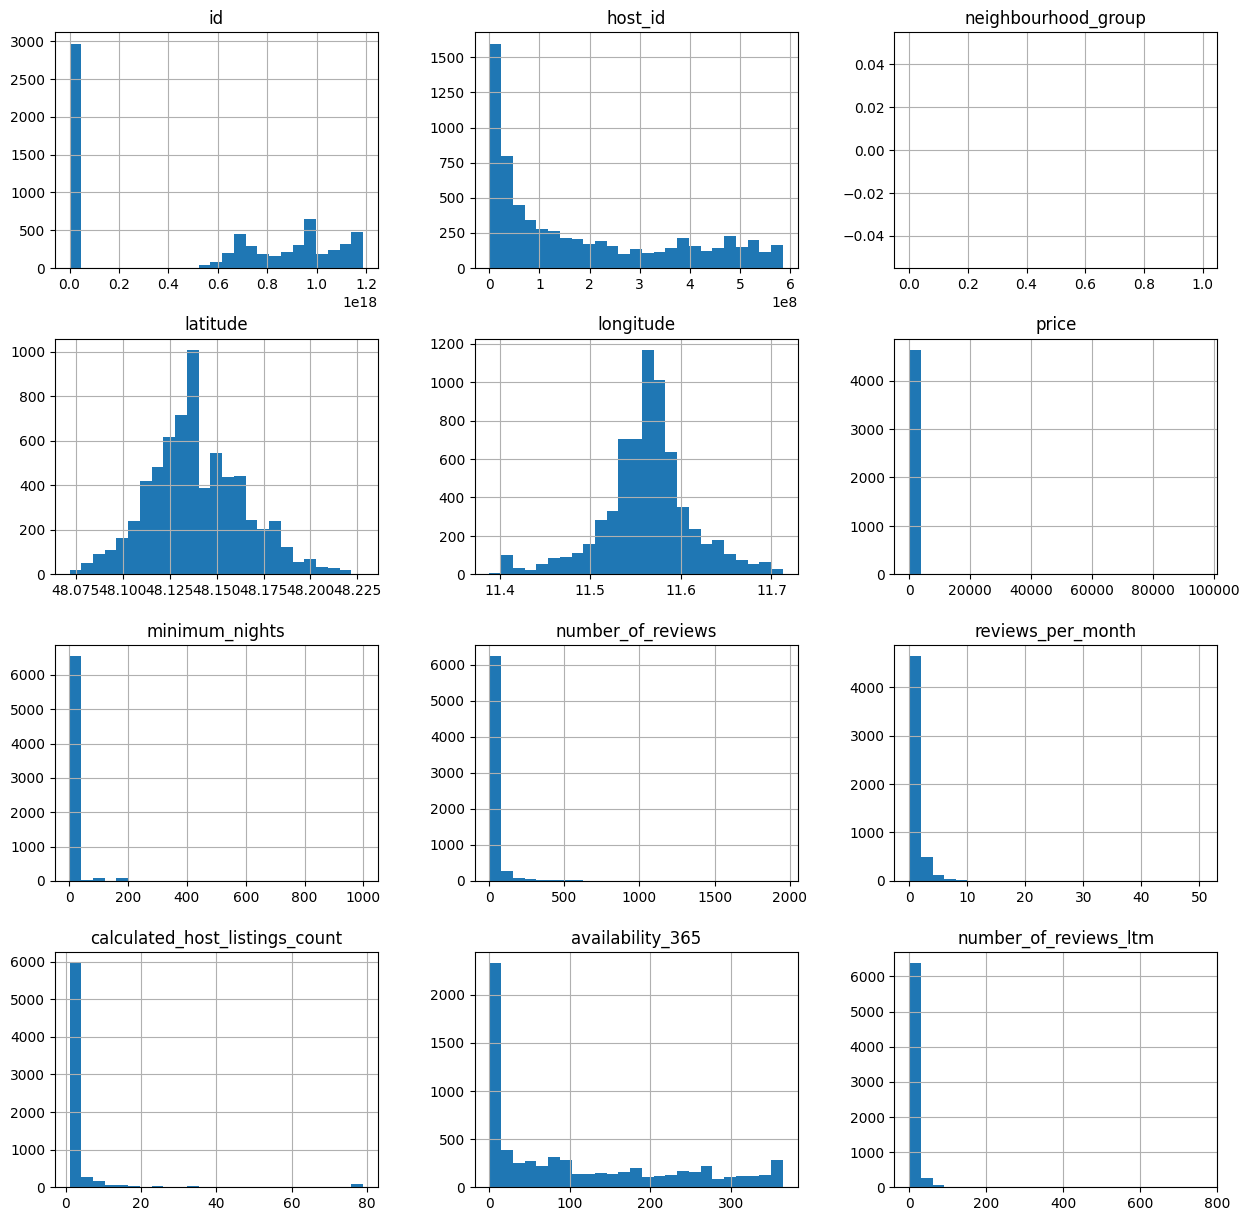

In [6]:
df.hist(bins=25,figsize=(15,15));

#### 5 - Histogram overviews and outliers
Through the histograms, it is possible to notice that some variables are not well distributed. This might indicate the presence of outliers in the values of these variables. To confirm this hypothesis, it is recommended to perform a statistical summary and plot a boxplot. The target variables for this analysis are: *price*, *minimum_nights*, *number_of_reviews*, *reviews_per_month*, *calculated_host_listings_count*, *number_of_reviews_ltm*.

In [7]:
df[["price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count","number_of_reviews_ltm"]].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm
count,4634.000000,6746.000000,6746.000000,5327.000000,6746.000000,6746.000000
mean,198.280967,8.462793,26.517344,0.991023,3.231545,6.963237
std,1431.018832,31.570992,77.996328,1.663162,9.085659,20.946127
min,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,80.000000,1.000000,1.000000,0.180000,1.000000,0.000000
50%,125.000000,2.000000,5.000000,0.450000,1.000000,1.000000
75%,199.000000,4.000000,19.000000,1.140000,2.000000,6.000000
max,96274.000000,999.000000,1955.000000,50.560000,79.000000,763.000000


The two columns we are interested in here is the *price* and *minimum_nights*. Using the `describe` method, we can see that the mean value for price is $ 198.28, the median value is $ 125.00, and the maximum value is $ 96274.00. It seems unresonable that the price for just one night could be as high as the maximum value. Additionally, due to the large difference between the mean and median values, there is a suspicion that there are high outliers distorting the data. The same can be said for the *minimum_nights* column. There these outliers must be removed.

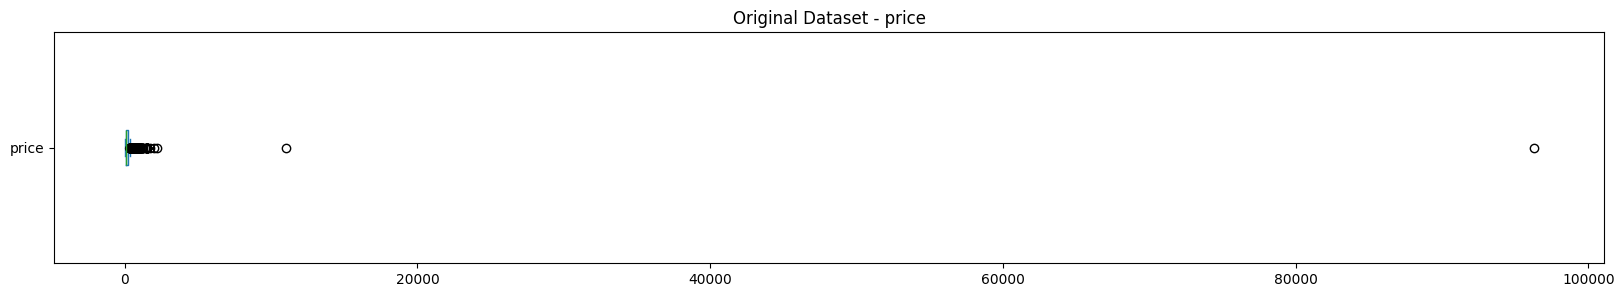

The dataset has 6746 entries.
Values over higher outlier limit ($ 377.5): 393
This amount represents 5.83% of the dataset


In [8]:
# boxplot for price
fig, ax = plt.subplots()
df["price"].plot(kind="box",vert=False, figsize=(20,3))
ax.set_title("Original Dataset - price")
plt.show()

# inter quantile range for price
q1_price = df["price"].quantile(0.25)
q3_price = df["price"].quantile(0.75)
IQR_price = q3_price - q1_price

# limits value to classify outliers
higher_outlier_limit_price = q3_price + 1.5 * IQR_price
lower_outlier_limit_price = q1_price - 1.5 * IQR_price

total_price_outliers = len(df[df["price"] > higher_outlier_limit_price])
percentual_price_outliers = total_price_outliers / df.shape[0] * 100

print(f"The dataset has {df.shape[0]} entries.")
print(f"Values over higher outlier limit ($ {higher_outlier_limit_price}): {total_price_outliers}")
print(f"This amount represents {percentual_price_outliers:.2f}% of the dataset")


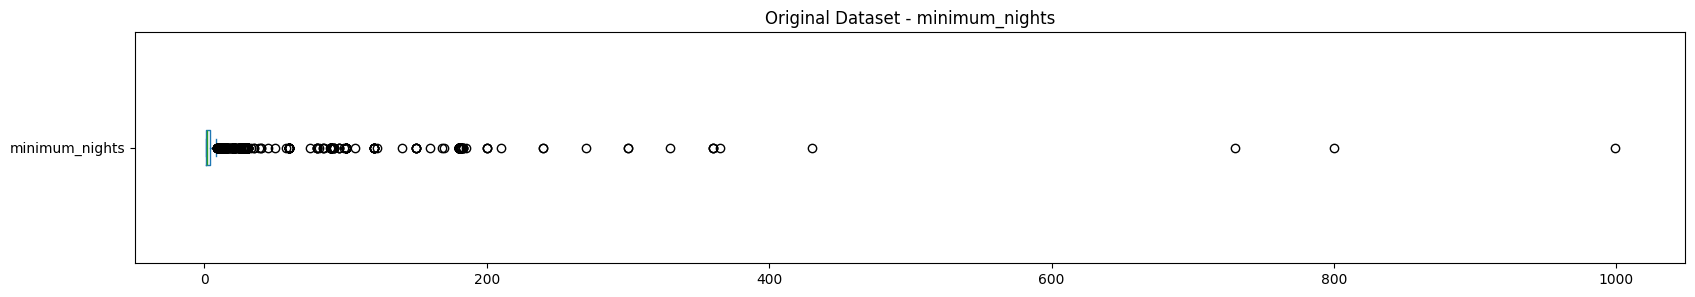

The dataset has 6746 entries.
Values over higher outlier limit (8.5 days): 4634
This amount represents 68.69% of the dataset


In [9]:
# boxplot for minimum_nights
fig, ax = plt.subplots()
df["minimum_nights"].plot(kind="box",vert=False, figsize=(20,3))
ax.set_title("Original Dataset - minimum_nights")
plt.show()

# inter quantile range for price
q1_minimum_nights = df["minimum_nights"].quantile(0.25)
q3_minimum_nights = df["minimum_nights"].quantile(0.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights

# limits value to classify outliers
higher_outlier_limit_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
lower_outlier_limit_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

total_minimum_nights_outliers = len(df[df["price"] > higher_outlier_limit_minimum_nights])
percentual_minimum_nights_outliers = total_minimum_nights_outliers / df.shape[0] * 100


print(f"The dataset has {df.shape[0]} entries.")
print(f"Values over higher outlier limit ({higher_outlier_limit_minimum_nights} days): {total_minimum_nights_outliers}")
print(f"This amount represents {percentual_minimum_nights_outliers:.2f}% of the dataset")

For *minimum_nights* the calculated upper outlier limit is 8.5 days. However, it is not uncommun for some accomodations to require at a miminum of 30 days for booking. Therefore, for *minimum_nights*  the upper limit for considering an outlier will be set at 30 days.

In [10]:
higher_outlier_limit_minimum_nights = 30
total_minimum_nights_outliers = len(df[df["minimum_nights"] > 30.0])
percentual_minimum_nights_outliers = total_minimum_nights_outliers / df.shape[0] * 100


print(f"The dataset has {df.shape[0]} entries.")
print(f"Values over higher outlier limit ({higher_outlier_limit_minimum_nights} days): {total_minimum_nights_outliers}")
print(f"This amount represents {percentual_minimum_nights_outliers:.2f}% of the dataset")

The dataset has 6746 entries.
Values over higher outlier limit (30 days): 220
This amount represents 3.26% of the dataset


#### 6 - Outliers removal
As seen above, the outlier values for the price and minimum_nights variables represent 5.83% and 3.26% of the total dataset entries, respectively. These outlier values will be removed from the dataset to allow a more accurate analysis.

After that, new histograms will be ploted.

In [11]:
# copy the original dataset for a new variable
df_clean = df.copy()

# removal of outliers
df_clean.drop(df_clean[df_clean["price"] > higher_outlier_limit_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean["minimum_nights"] > higher_outlier_limit_minimum_nights].index, axis=0, inplace=True)

# removal of unused columns
df_clean.drop(["neighbourhood_group", "license", "reviews_per_month", "number_of_reviews_ltm"], axis=1, inplace=True)


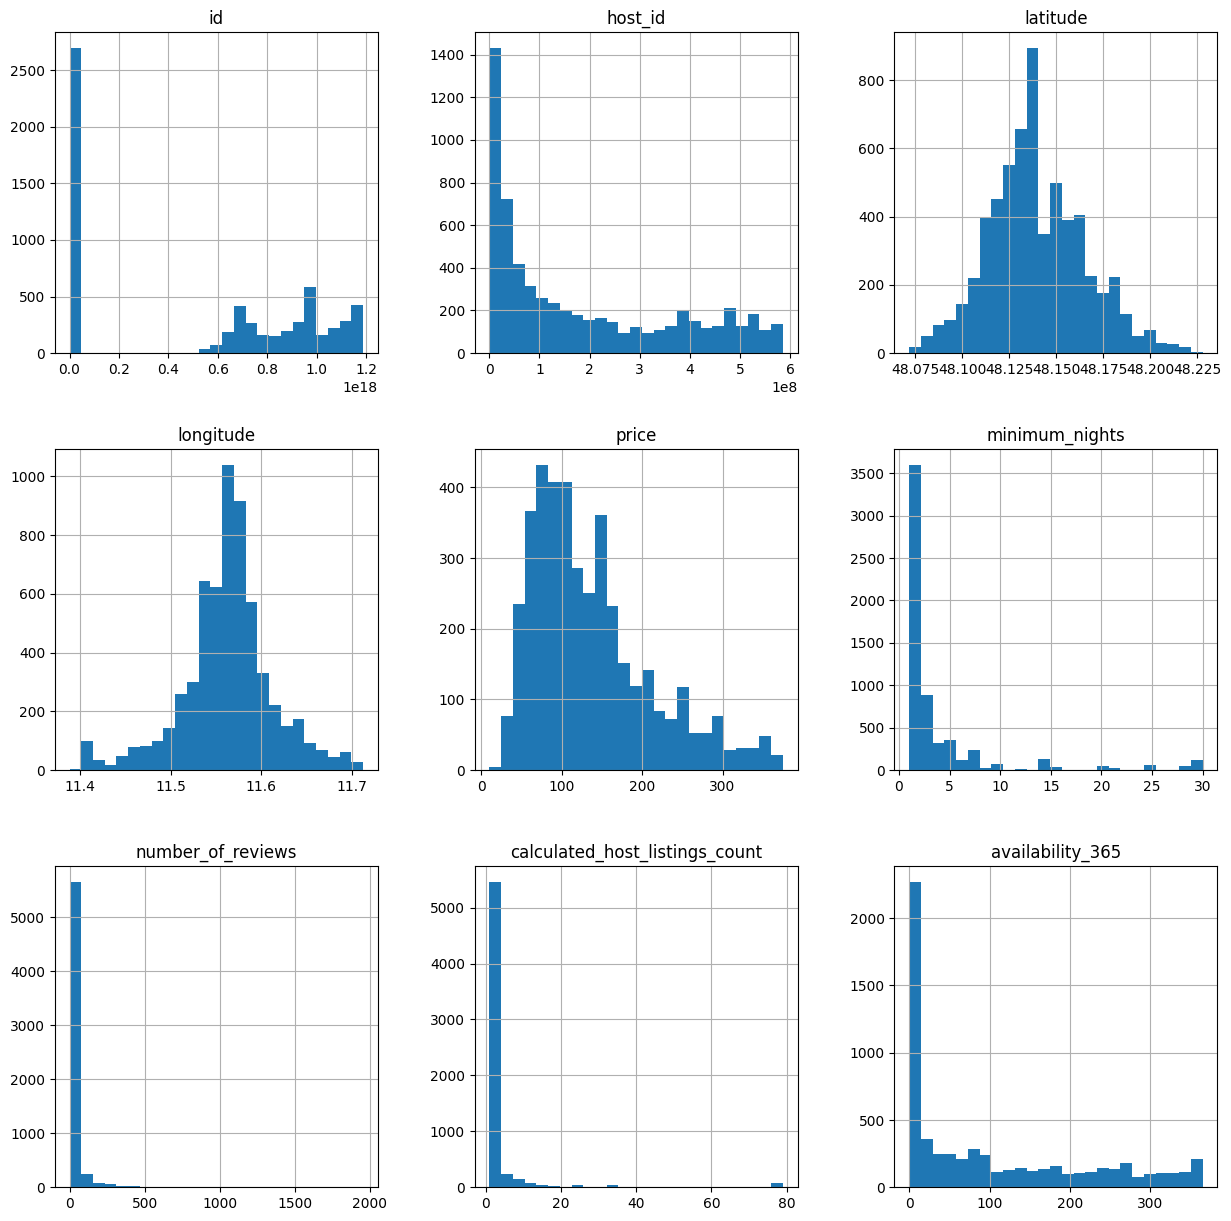

In [12]:
df_clean.hist(bins=25,figsize=(15,15));

#### 7 - Correlation
To understand how one variable influences another, we can observe the correlation between variables. First, a correlation matrix will be created, and then, for better visualization, a heatmap displaying these correlations will be generated using the Seaborn library.

In [14]:
correlation = df_clean[["price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr()
display(correlation)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,-0.116805,-0.082283,0.057201,0.123564
minimum_nights,-0.116805,1.000000,-0.095187,0.087428,-0.031511
number_of_reviews,-0.082283,-0.095187,1.000000,-0.004443,0.091755
calculated_host_listings_count,0.057201,0.087428,-0.004443,1.000000,0.070085
availability_365,0.123564,-0.031511,0.091755,0.070085,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

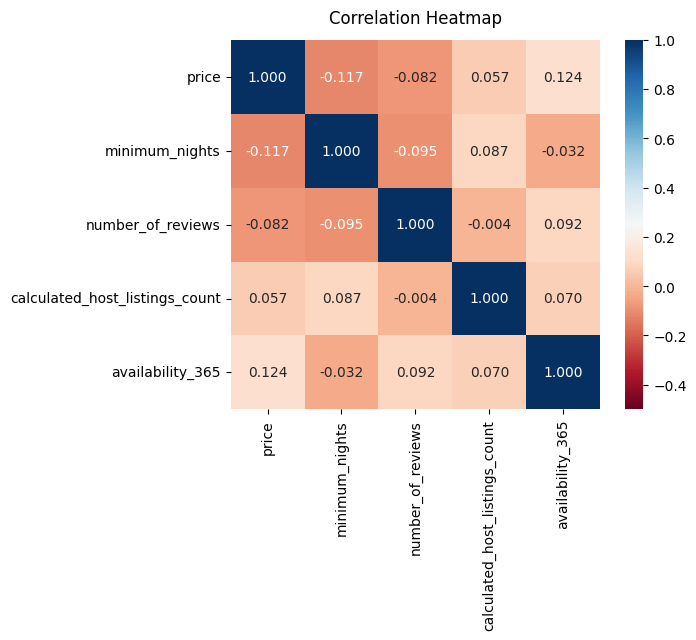

In [30]:
heatmap = sns.heatmap(correlation, vmin=-0.50, vmax=1, cmap='RdBu', fmt=".3f", annot=True, square=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

#### 8 - Accomodation types
The *room_type* column indicates the type of accomodation available. This information is important for identifying the types of rooms listed and adetermining which is the most common.

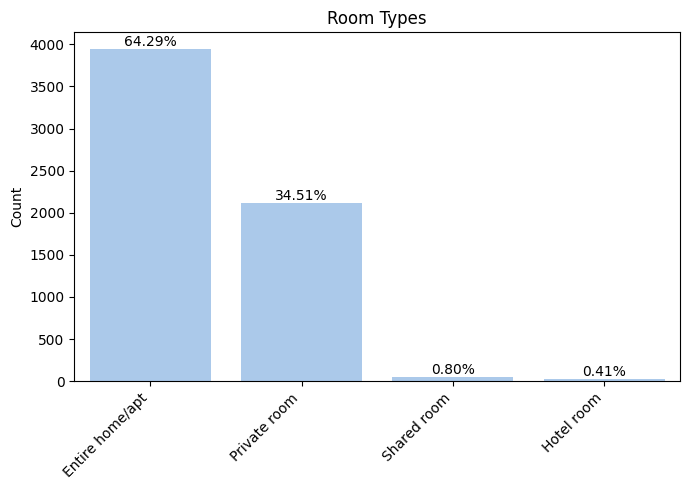

In [129]:
# Calculate room types counts and percentage
room_types_counts = df_clean["room_type"].value_counts()
room_types_pct = room_types_counts / df_clean.shape[0] * 100

# bar graph preparation
fig, ax = plt.subplots(figsize=(7,5))
sns.set_color_codes("pastel")

# Create the bar plot with percentage labels
bars = sns.barplot(x=room_types_counts.index, y=room_types_counts, color='b')
ax.bar_label(bars.containers[0], labels=room_types_pct.apply("{:.02f}%".format), label_type="edge")

# Plot customization
plt.xticks(rotation=45, ha="right")
bars.set_title("Room Types")
bars.set_xlabel("")
bars.set_ylabel("Count")


plt.tight_layout()  # Adjust spacing to avoid clipping of labels
plt.show()



#### 9 - Neighbourhood prices
Mean price by neighbourhood.

neighbourhood
Altstadt-Lehel                                            183.675214
Ludwigsvorstadt-Isarvorstadt                              168.696970
Schwanthalerhöhe                                          154.089431
Au-Haidhausen                                             151.763265
Maxvorstadt                                               151.641379
Sendling                                                  139.979730
Schwabing-Freimann                                        139.414286
Laim                                                      137.684615
Bogenhausen                                               137.420118
Schwabing-West                                            132.432099
Neuhausen-Nymphenburg                                     131.418699
Aubing-Lochhausen-Langwied                                129.645833
Untergiesing-Harlaching                                   128.460177
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln    127.091954
Hadern              

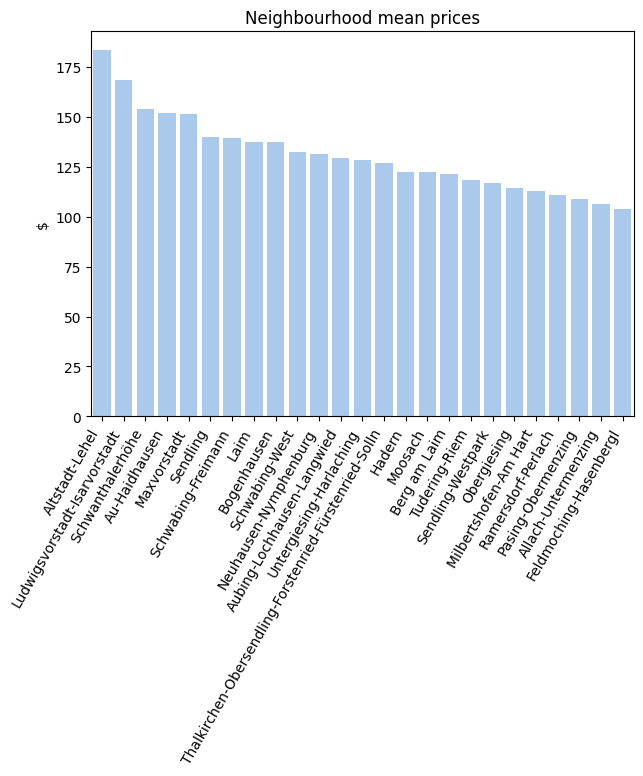

In [154]:
mean_price_by_ngbh = df_clean.groupby("neighbourhood")["price"].mean().sort_values(ascending=False)
print(mean_price_by_ngbh)

# bar graph preparation
fig, ax = plt.subplots(figsize=(7,5))

# create the bar plot
bars = sns.barplot(x=mean_price_by_ngbh.index, y=mean_price_by_ngbh, color='b')

# plot customization
plt.xticks(rotation=60, ha="right")
bars.set_title("Neighbourhood mean prices")
bars.set_xlabel("")
bars.set_ylabel("$")

plt.show()

#### 10 - Geographical distribuition
Analyze how accommodation prices are distributed across the city, according to the latitude and longitude of each accommodation.

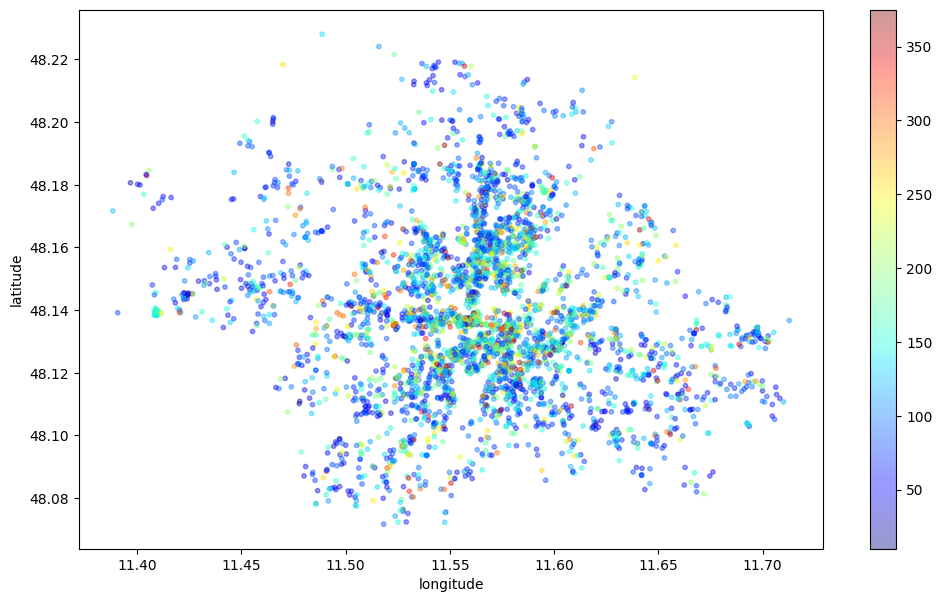

In [175]:
df_clean.plot(kind="scatter", c=df_clean["price"], x="longitude", y="latitude", alpha=0.4, s=10, cmap=plt.get_cmap('jet'), figsize=(12,7));

### Conclusion
This project conducted a quick analysis of Airbnb data for Munich. We observed that before performing any in-depth analysis, it is essential to become familiar with the dataset, understand its variables, assess its size, and verify and address any null values. Additionally, through histogram plots, the presence of outliers was noted. Therefore, before any data analysis, it is crucial to remove these outliers. The criteria used for outlier removal was to eliminate values greater than *Q3_value + 1.5\*IQR_range*. After this removal, new histograms were plotted, revealing that the most common price range is $20 - $200, and the minimum night requirement for most bookings is below 5 nights. More than half of the listings are for entire apartments. And the three most expensive neighborhoods are Altstadt-Lehel, Ludwigsvorstadt-Isarvorstadt, and Schwanthalerhöhe